A Notebook for evaluating the AI trained in 'CNN-RNN-CTC'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("eval_metrics.csv")

In [3]:
df.head()

,epoch,ctc_loss,val_loss,cer,wer
0,0.0,47.183956,47.243195,1.000000,1.000000
1,1.0,47.071602,47.097996,1.000000,1.000000
2,2.0,46.850941,46.713036,0.968848,0.990597
3,3.0,45.724438,45.035801,0.852182,1.000000
4,4.0,44.527946,44.318192,0.856752,1.000000


<Figure size 1200x500 with 0 Axes>

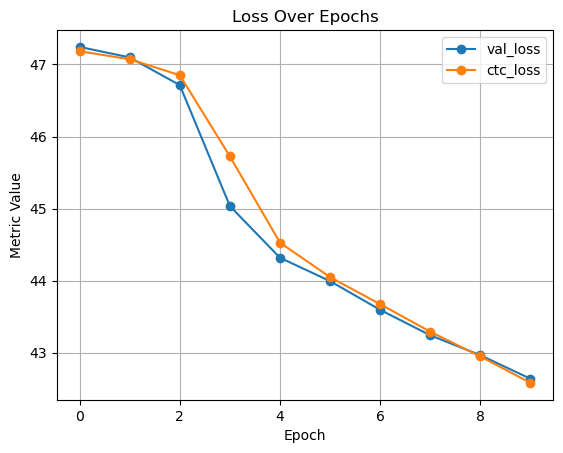

In [4]:
plt.figure(figsize=(12, 5))
df.plot(
    x="epoch", y=["val_loss", "ctc_loss"], kind="line", marker="o"
)
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Loss Over Epochs")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [5]:
# Calculate average absolute difference between ctc_loss and val_loss
average_loss_difference = (df["ctc_loss"] - df["val_loss"]).abs().mean()

print("Average absolute difference:", average_loss_difference)

Average absolute difference: 0.13801803588867118


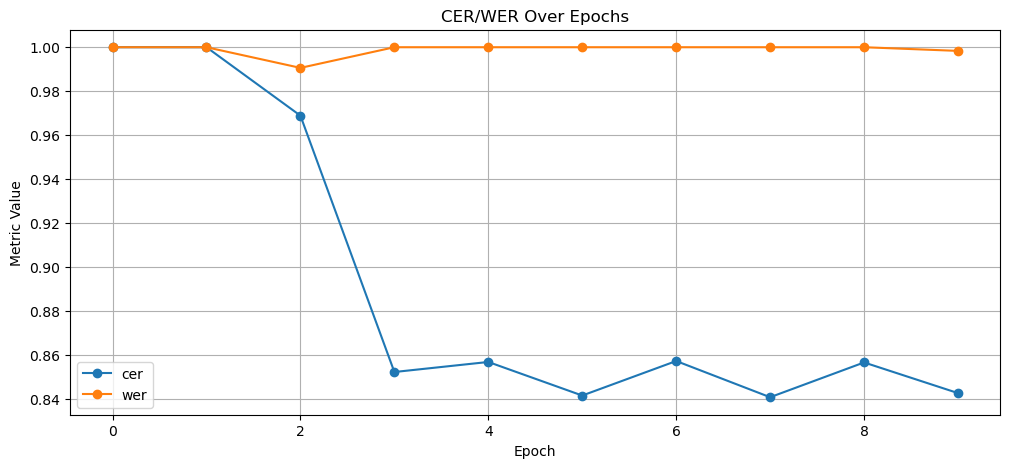

In [6]:
plt.figure(figsize=(12, 5))
df.plot(
    x="epoch", y=["cer", "wer"], kind="line", marker="o", ax=plt.gca()
)
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("CER/WER Over Epochs")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [7]:
# Calculate absolute differences between CER and WER
df["cer_wer_diff"] = (df["cer"] - df["wer"]).abs()

# Find the maximum difference and corresponding epoch
max_diff = df["cer_wer_diff"].max()
max_diff_epoch = df.loc[df["cer_wer_diff"].idxmax(), "epoch"]

print(f"Maximum absolute difference between CER and WER: {max_diff}")
print(f"Occurred at epoch: {max_diff_epoch}")

Maximum absolute difference between CER and WER: 0.1592930559760123
Occurred at epoch: 7.0
